# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Laramie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
news_key = os.getenv('newsapi_key')
type(news_key)

str

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_key)

In [65]:
analyzer = SentimentIntensityAnalyzer()

In [36]:
def allnews_to_df(query, return_dict= False):
    """returns all articles from NewsApi to a dataframe by default"""
    your_news = newsapi.get_everything(q= query, language='en')
    if return_dict == False:
        return pd.DataFrame.from_dict(your_news['articles'])
    else:
        return your_news

In [66]:
def get_sentiment(query):
    """pass a query, get a dataframe with the polarity scores, date, and content for your query"""
    your_news = newsapi.get_everything(q= query, language='en')
    analyzer = SentimentIntensityAnalyzer()
    sentiment_list = []
    for article in your_news['articles']:
        try:
            sentiment = analyzer.polarity_scores(article['content'])
            sentiment_list.append({
            "text": article['content'],
            "date": article["publishedAt"][:10],
            "compound": sentiment["compound"],
            "positive": sentiment["pos"],
            "negative": sentiment["neu"],
            "neutral": sentiment["neg"] 
        })
        except AttributeError:
            pass
    return pd.DataFrame(sentiment_list)

In [184]:
btc_df = get_sentiment('BITCOIN')
btc_df['text'][0]

'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]'

In [75]:
# Create the Bitcoin sentiment scores DataFrame
# Create the Ethereum sentiment scores DataFrame
btc_df = get_sentiment('BITCOIN')
eth_df = get_sentiment('ETHEREUM')
display(btc_df.head())
display(eth_df.head())

,text,date,compound,positive,negative,neutral
0,Its set to open later this year\r\nIf you buy ...,2022-04-08,-0.4404,0.000,0.919,0.081
1,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.912,0.000
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.772,0.143
3,"You might have heard of crypto Twitter, the co...",2022-04-05,-0.2732,0.000,0.943,0.057
4,The wallet will have USB-C and a fingerprint r...,2022-04-06,-0.4404,0.000,0.912,0.088


,text,date,compound,positive,negative,neutral
0,The US Department of Treasury says Lazarus is ...,2022-04-14,-0.7845,0.088,0.681,0.231
1,"18 with 15 posters participating, including st...",2022-04-13,0.1027,0.084,0.844,0.071
2,"Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.7351,0.188,0.812,0.000
3,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.879,0.075
4,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.945,0.055


In [73]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.052995,0.063000,0.892100,0.044900
std,0.391075,0.066013,0.071374,0.045254
min,-0.542300,0.000000,0.772000,0.000000
25%,-0.273200,0.000000,0.842500,0.000000
50%,0.000000,0.059000,0.904000,0.060000
75%,0.400700,0.085750,0.938500,0.078750
max,0.735100,0.197000,1.000000,0.143000


In [76]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.000350,0.074750,0.861650,0.063550
std,0.474800,0.104122,0.115485,0.069961
min,-0.784500,0.000000,0.594000,0.000000
25%,-0.273200,0.000000,0.809750,0.000000
50%,-0.127900,0.051500,0.899500,0.059000
75%,0.303775,0.085000,0.939000,0.080750
max,0.932700,0.349000,1.000000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [77]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [206]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_expand = set('char')

In [212]:
# Complete the tokenizer function
def tokenizer(df_text_col):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")

    clean_text = [regex.sub(' ',text) for text in df_text_col]
    
    # Create a tokenized list of the words
    w_tokens = [word_tokenize(word.lower()) for word in clean_text]
    
    
    # Lemmatize words into root words
    output = []
    for list in w_tokens: 
     output.append([lemmatizer.lemmatize(word) for word in list if word not in sw.union(sw_expand)])

    return output

In [213]:
# Create a new tokens column for Bitcoin
btc_df['word_tokens'] = tokenizer(btc_df['text'])
btc_df.head()

,text,date,compound,positive,negative,neutral,word_tokens
0,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.882,0.061,"[bitcoin, mining, site, powered, otherwise, lo..."
1,Its set to open later this year\r\nIf you buy ...,2022-04-08,-0.4404,0.000,0.919,0.081,"[set, open, later, year, buy, something, verge..."
2,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.912,0.000,"[wikipedia, editor, voted, favor, dropping, cr..."
3,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.772,0.143,"[warren, buffett, always, bitcoin, skeptic, bi..."
4,"You might have heard of crypto Twitter, the co...",2022-04-05,-0.2732,0.000,0.943,0.057,"[might, heard, crypto, twitter, corner, social..."


In [214]:
# Create a new tokens column for Ethereum
eth_df['word_tokens'] = tokenizer(eth_df['text'])
eth_df['word_tokens'][0]

['u',
 'department',
 'treasury',
 'say',
 'lazarus',
 'behind',
 'attack',
 'u',
 'treasury',
 'department',
 'blame',
 'north',
 'korean',
 'hacking',
 'group',
 'lazarus',
 'stealing',
 'million',
 'cryptocurrency',
 'ronin',
 'networ',
 'char']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [193]:
from collections import Counter
from nltk import ngrams

In [194]:
# Generate the Bitcoin N-grams where N=2

# We need to look at all the word tokens together, or just flatten out the list of lists in our 'word_tokens' column. We'll make a quick funtion to do that
def flatten(list_of_lists):
    # Read: take a list out of the nested lists, and put the item from that sublist in a list
    return [item for sublist in list_of_lists for item in sublist]


In [195]:

# We'll call the function and save the entire list to a variable
btc_all_tokens= flatten(btc_df['word_tokens'].to_list())

# Now we'll use this for the ngrams method call
bigram_totals = Counter(ngrams(btc_all_tokens, n=2))
print(dict(bigram_totals))



{('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picard'): 1, ('picard', 'afp'): 1, ('afp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'image'): 1, ('image', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', 'fl'): 1, ('fl', 'char'): 1, ('char', 'set'): 1, ('set', 'open'): 1, ('open', 'later'): 1, ('later', 'year'): 1, ('year', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'medium'): 1, ('medium', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statement'): 1, ('statement', 'illustration'): 1, ('illustration', 'alex'): 1,

In [196]:
# Generate the Ethereum N-grams where N=2
eth_all_tokens= flatten(eth_df['word_tokens'].to_list())

bigram_totals = Counter(ngrams(eth_all_tokens, n=2))
print(dict(bigram_totals))

{('u', 'department'): 1, ('department', 'treasury'): 1, ('treasury', 'say'): 1, ('say', 'lazarus'): 1, ('lazarus', 'behind'): 1, ('behind', 'attack'): 1, ('attack', 'u'): 1, ('u', 'treasury'): 1, ('treasury', 'department'): 1, ('department', 'blame'): 1, ('blame', 'north'): 1, ('north', 'korean'): 1, ('korean', 'hacking'): 1, ('hacking', 'group'): 1, ('group', 'lazarus'): 1, ('lazarus', 'stealing'): 1, ('stealing', 'million'): 1, ('million', 'cryptocurrency'): 1, ('cryptocurrency', 'ronin'): 1, ('ronin', 'networ'): 1, ('networ', 'char'): 1, ('char', 'poster'): 1, ('poster', 'participating'): 1, ('participating', 'including'): 1, ('including', 'story'): 1, ('story', 'author'): 1, ('author', 'long'): 1, ('long', 'time'): 1, ('time', 'wikipedia'): 1, ('wikipedia', 'editor'): 1, ('editor', 'requested'): 1, ('requested', 'wikimedia'): 1, ('wikimedia', 'foundation'): 1, ('foundation', 'stop'): 1, ('stop', 'accepting'): 1, ('accepting', 'cryptocurrency'): 1, ('cryptocurrency', 'donation'): 1,

In [197]:
# Function token_count generates the top N words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(tokens).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [198]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_all_tokens)

,word,count
0,char,20
1,bitcoin,16
2,april,7
3,reuters,5
4,block,4
5,cryptocurrency,4
6,company,4
7,million,4
8,editor,3
9,online,3


In [199]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_all_tokens)

,word,count
0,char,20
1,cryptocurrency,8
2,ethereum,7
3,april,6
4,year,5
5,u,4
6,browser,4
7,nft,4
8,reuters,4
9,north,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [200]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

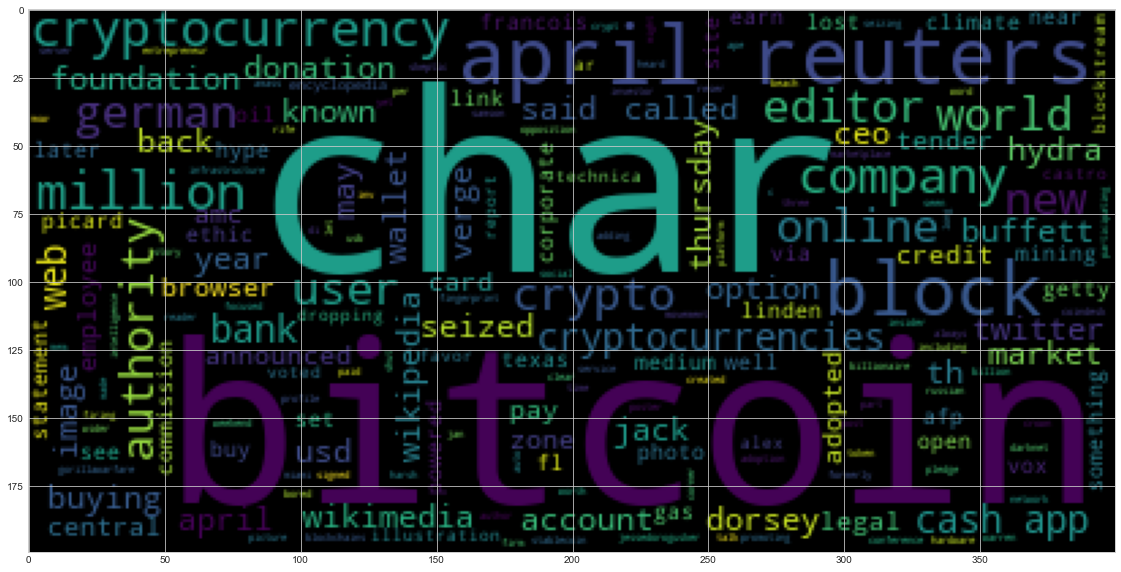

In [201]:
# Generate the Bitcoin word cloud
btc_input = ' '.join(btc_all_tokens)
wc = WordCloud().generate(btc_input)
plt.imshow(wc)

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---